# Problem 1: Clustering
## A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.


# Data Dictionary for Market Segmentation:
#### 1.	spending: Amount spent by the customer per month (in 1000s)
#### 2.	advance_payments: Amount paid by the customer in advance by cash (in 100s)
#### 3.	probability_of_full_payment: Probability of payment done in full by the customer to the bank
#### 4.	current_balance: Balance amount left in the account to make purchases (in 1000s)
#### 5.	credit_limit: Limit of the amount in credit card (10000s)
#### 6.	min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
#### 7.	max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)


# 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
bank_df=pd.read_csv('bank_marketing_part1_Data-1.csv')
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [3]:

print('The number of rows of the dataframe is',bank_df.shape[0],'.')
print('The number of columns of the dataframe is',bank_df.shape[1],'.')

The number of rows of the dataframe is 210 .
The number of columns of the dataframe is 7 .


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


# Inference
# There are 210 rows and 7 columns
# There are no null values

In [5]:
bank_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


# Inference
# SPENDING:
#### Minimum amount spend - 10590 
#### Maximum amount spend - 21180
#### Average amount spend - 14847

# PROBABILITY OF FULL PAYMENT:
#### On average 87% of customers made a full payment

# ADVANCE_PAYMENTS:
#### Customers pay 1725 as maximum payment

# MAX SPENT IN SINGLE SHOPPING:
#### On average customers spend 5408 on single shopping

# MIN PAYMENT AMOUNT:
#### This variable may have outliers

In [6]:
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

#### There are no null values 


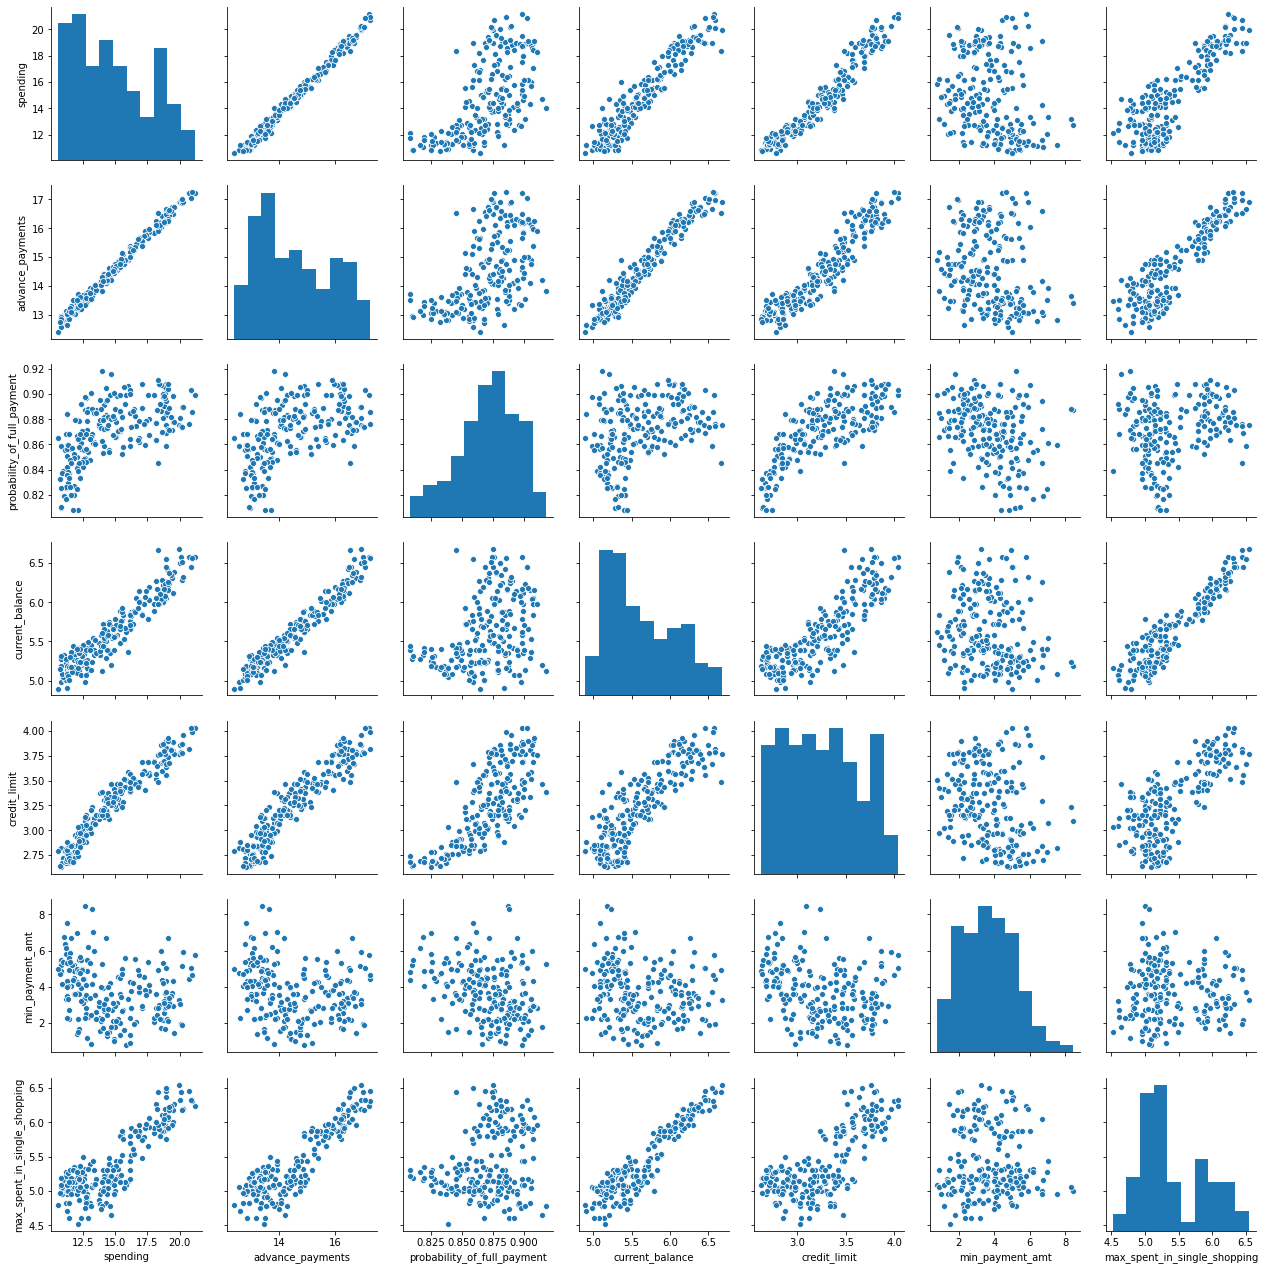

In [7]:
sns.pairplot(bank_df)

# Inference:
#### spending and advance payments are highly correlated
#### Most of the variables are left skewed

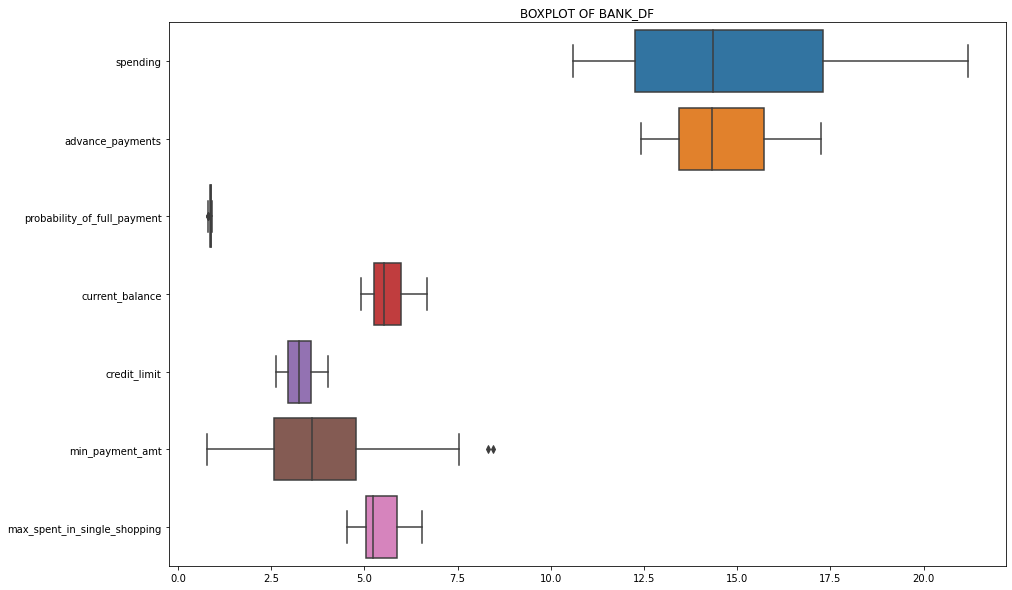

In [8]:
plt.subplots(figsize=(15,10))
plt.title('BOXPLOT OF BANK_DF')
sns.boxplot(data=bank_df,orient="h")
plt.show()

# Inference
#### Most of the variable has no outliers, only min_payment_amt have outlier 

In [9]:
bank_df.duplicated().sum()

0

#### There are no duplicates.

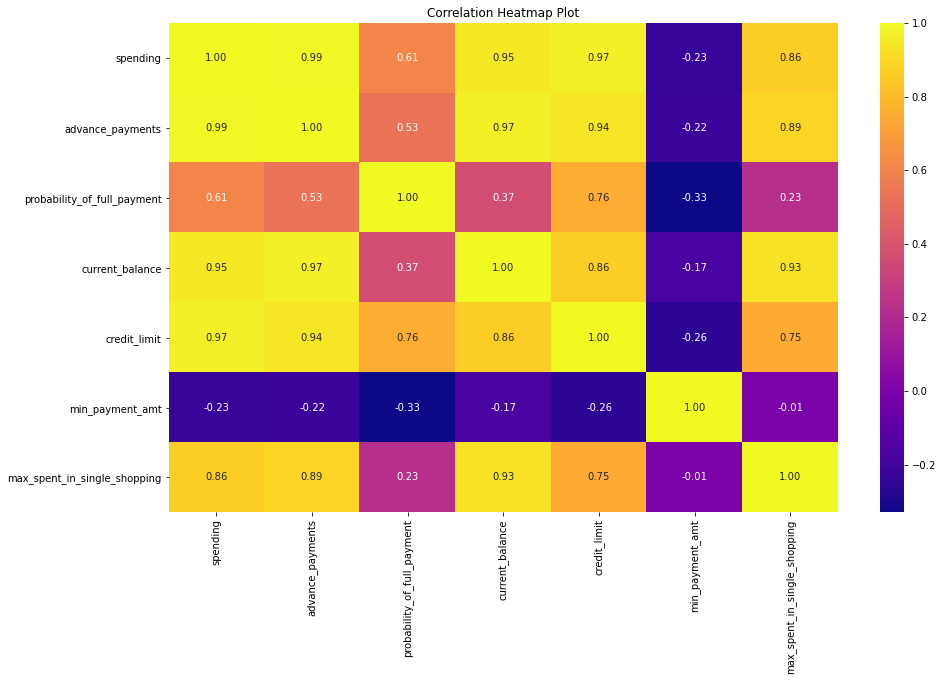

In [10]:
plt.figure(figsize=(15,9))
sns.heatmap(round(bank_df.corr(),2),fmt='.2f',annot=True,cmap='plasma')
plt.title('Correlation Heatmap Plot')
plt.show()

# Inference
##### Spending and advance payments variables are highly correlated.
##### Max spent in single shopping and min payment amount are slightly correlated

# 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [11]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_bank_df = X.fit_transform(bank_df)
scaled_bank_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [12]:
scaled_bank_df = pd.DataFrame(scaled_bank_df, index=bank_df.index, columns=bank_df.columns)
scaled_bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


# Inference
##### To make sure that calculations will not be biased either to the very high or to the very low values. In other words, to make sure that all your data are at the same level.
##### In this dataset, variables like Credit limit, spending ,current balance have higher values whereas max payment amount have low values .There is probability of full payment .so most of the variables have different level of values.so ,it is wise to scale the data.
##### Scaling will make dataset are notbiases and all data are at same level..  StandardScaler used in this dataset.so.the values stays between 0 and 1

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [14]:
HClust = linkage(scaled_bank_df, method = 'ward')

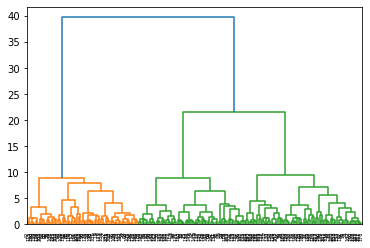

In [15]:
dend = dendrogram(HClust)

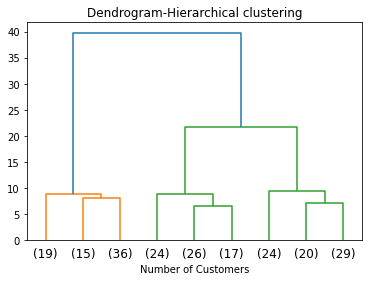

In [16]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 9,
                 )
plt.title('Dendrogram-Hierarchical clustering') 
plt.xlabel('Number of Customers') 
 
plt.show()

# Inference
##### A dendrogram is a diagram that shows the hierarchical relationship between objects.
##### The dendrogram above shows the hierarchical clustering of 9 observations
##### The height of the dendrogram indicates the order in which the clusters were joined.
##### The dendrogram shows us that the big difference between clusters is between the 2 clusters
##### This dendrogram shows 2 clusters ,but two clusters do not make much difference in the business impact.so , further process done with 3 clusters

In [17]:
from scipy.cluster.hierarchy import fcluster

In [18]:
#Method 1

clusters_1 = fcluster(HClust, 3, criterion='maxclust')
clusters_1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [19]:
# Method 2

clusters_2 = fcluster(HClust, 20, criterion='distance')
clusters_2

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

#### Now, let us go ahead and check whether the number of clusters generated by the 'maxclust' criterion is same as the number of clusters generated by the 'distance' criterion.

In [20]:
np.array_equal(clusters_1,clusters_2)

True

### number of clusters generated by "maxclust" and "distance " critertion is same

In [21]:
bank_df['H_clusters'] = clusters_1

In [22]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [23]:
bank_df.to_csv('H_Cluster1.csv')

In [24]:
h_clust=bank_df['H_clusters'].value_counts()
h_clust

3    73
1    70
2    67
Name: H_clusters, dtype: int64

Number of customers in each clusters
3    73
1    70
2    67
Name: H_clusters, dtype: int64


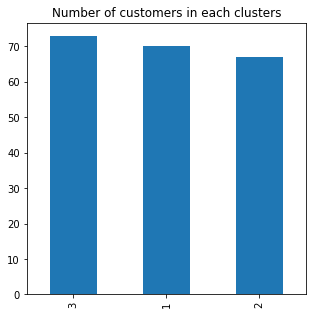

In [25]:
h_clust.plot.bar(stacked=False,figsize=(5,5))
plt.title('Number of customers in each clusters')
print('Number of customers in each clusters' )

print(h_clust)

# Inference
##### In hierarchical clustering, 3 clusters were genterated using Maxclust critertion
##### Cluster 1 have 70 customers
##### cluster 2 have 67 customers
##### cluster 3 have 73 customers

# Hierarchical cluster profiling

In [26]:
bank_df.H_clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: H_clusters, dtype: int64

In [30]:
#clust_profile=bank_df.drop(['Kmeans_clusters',"Agglo_CLusters"],axis=1)
clust_profile=bank_df.groupby('H_clusters').mean()
clust_profile['freq']=bank_df.H_clusters.value_counts().sort_index()
clust_profile.T

H_clusters,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
freq,70.000000,67.000000,73.000000


Text(0.5, 1.0, 'Cluster Profiling of hierarchical clusters')

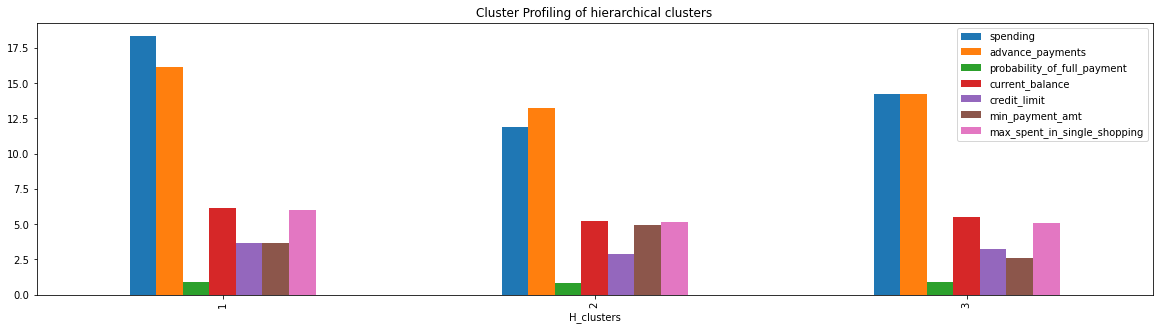

In [32]:
#clust_bar=bank_df.drop(['Kmeans_clusters','Agglo_CLusters'],axis=1)
clust=bank_df.groupby('H_clusters').mean()
clust.plot.bar(stacked=False,figsize=(20,5))
plt.title('Cluster Profiling of hierarchical clusters')

# Inference:
## Cluster Profiling of hierarchical clusters:
##### 1.Cluster1 consists of high profile customers with more spending and high advance payment  with more credit limit than others. Probability of full payment is 88.4%
##### 2.Cluster2 consists of low profile customers with very less spending and less advance payments customers with very low credit limit. Probability of full payment is 84.8%
##### 3.Cluster3 consists of medium level customer with moderate spending and moderate level of advance payment customers with low minimum payment amount, Probability of full payment is 87.9%

# Using Agglomerative Clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(bank_df.iloc[:,0:6])
print(Cluster_agglo)

[1 2 1 0 1 0 0 2 1 0 1 2 0 1 2 0 2 0 0 2 0 0 1 2 2 1 2 0 0 0 2 0 0 2 0 0 0
 0 0 1 1 2 1 1 0 0 2 1 1 1 2 1 1 1 1 1 0 0 0 1 2 0 0 1 2 1 1 2 1 0 2 0 1 1
 0 1 2 0 1 2 2 2 2 1 0 2 2 1 1 0 0 1 2 0 0 1 1 1 0 1 0 1 2 1 2 1 1 0 0 1 2
 2 1 0 0 1 2 0 0 1 2 0 0 2 2 2 1 0 2 2 0 2 0 1 0 1 1 0 1 2 1 2 0 0 2 0 1 0
 2 0 2 0 2 2 2 2 2 0 2 1 1 0 1 1 1 0 1 2 2 2 2 0 2 1 1 1 2 2 2 0 2 2 2 2 1
 1 2 2 2 0 2 2 0 1 2 1 1 0 1 0 2 1 2 0 1 2 1 2 2 2]


In [35]:
# Appending clusters to original dataset

In [36]:
bank_df["Agglo_CLusters"]=Cluster_agglo

In [37]:
# Agglomerative Cluster Frequency
agglo_clust=bank_df.Agglo_CLusters.value_counts().sort_index()
agglo_clust

0    67
1    70
2    73
Name: Agglo_CLusters, dtype: int64

Number of customers in each clusters
0    67
1    70
2    73
Name: Agglo_CLusters, dtype: int64


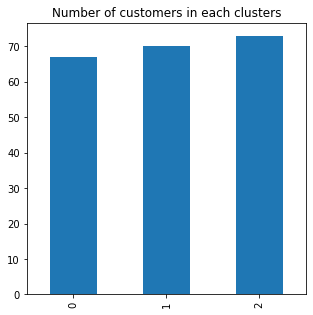

In [38]:
agglo_clust.plot.bar(stacked=False,figsize=(5,5))
plt.title('Number of customers in each clusters')
print('Number of customers in each clusters' )

print(agglo_clust)

In [ ]:
# Agglomeraive Cluster Profiles

In [39]:
agglo_data=bank_df.drop(["H_clusters"],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq_agglo']=bank_df.Agglo_CLusters.value_counts().sort_index()
agglo_data.T

Agglo_CLusters,0,1,2
spending,11.921045,18.349714,14.175205
advance_payments,13.260448,16.138429,14.237123
probability_of_full_payment,0.850870,0.884027,0.876979
current_balance,5.228910,6.155243,5.490247
credit_limit,2.866597,3.680143,3.214178
min_payment_amt,5.040701,3.723400,2.447633
max_spent_in_single_shopping,5.097881,6.009857,5.115712
Freq_agglo,67.000000,70.000000,73.000000


Text(0.5, 1.0, 'Cluster Profiling of Agglomerative clusters')

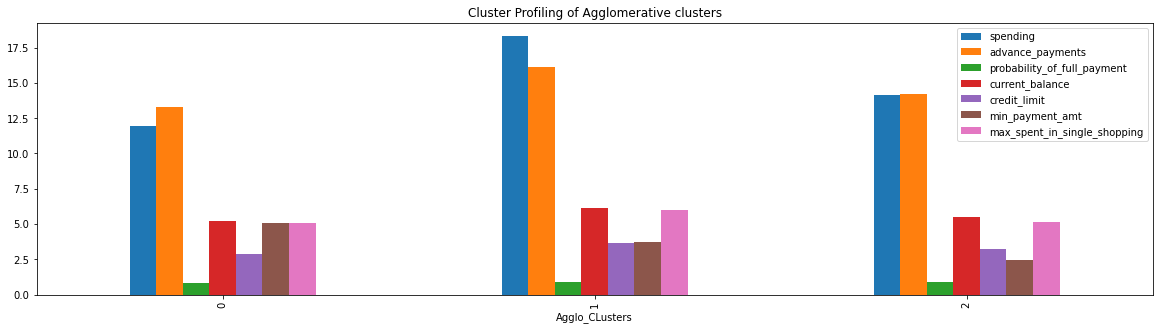

In [40]:
agglo_bar=bank_df.drop(['H_clusters'],axis=1)
agglo=agglo_bar.groupby('Agglo_CLusters').mean()
agglo.plot.bar(stacked=False,figsize=(20,5))
plt.title('Cluster Profiling of Agglomerative clusters')

# Inference:
## Cluster Profiling of Agglomerative clusters:
##### 1.Cluster0 consists of low spending and low advance payments customers with low credit limit than other cluster customers. Probability of full payment is 85.0%
##### 2.Cluster1 consists of high spending and high advance payments customers with good credit limit. Probability of full payment is 88.4%
##### 3.Cluster2 consists of medium level spending and medium level advance payment customers with very low minimum payment amount than other cluster customers .Probability of full payment is 87.6%
## Based on comparing hierarchical and Agglomerative clusters, both type of clusters yield same results

# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

##### Creating Clusters using KMeans
##### Forming 3 Clusters with K=3

In [41]:
from sklearn.cluster import KMeans 

In [42]:
k_means3 = KMeans(n_clusters = 3,random_state=1)
k_means3.fit(scaled_bank_df)
k_means3.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [43]:
#within cluster sum of squares for 3 clusters
k_means3.inertia_

430.6589731513006

### Calculating WSS for other values of K - Elbow Method

In [44]:
#Find the Within Sum of Squares (WSS) for 2 to 15 clusters.
wss =[] 
for i in range(1,15):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_bank_df)
    wss.append(KM.inertia_)


In [45]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267,
 241.81894656086033,
 223.91254221002725,
 206.39612184786694,
 193.2835133180646,
 182.97995389115258,
 175.11842017053073,
 166.02965682631788]

# elbow curve

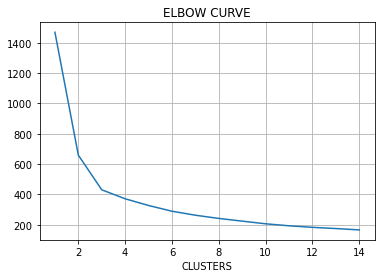

In [46]:
plt.plot(range(1,15), wss)
plt.title('ELBOW CURVE')
plt.xlabel('CLUSTERS')
plt.grid()
plt.show()

##### Elbow curve shows 3 is optiminal value

# Find the optimum number of clusters from the WSS plot

In [47]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_bank_df)
labels = k_means.labels_
labels

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [48]:
k_means3 = KMeans(n_clusters = 3,random_state=1)
k_means3.fit(scaled_bank_df)
labels_3 = k_means3.labels_
labels_3

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

# Check the average silhouette score and silhouette width of the clusters

In [49]:
DF_Kmeans = bank_df.drop(['H_clusters','Agglo_CLusters'],axis=1)

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [51]:
#Let us check the silhouette score and silhouette width for 2 clusters.
silhouette_score(scaled_bank_df,labels)

0.46577247686580914

In [52]:
silhouette_samples(scaled_bank_df,labels).min()

-0.006171238927461077

In [53]:
#Let us check the silhouette score and silhouette width for 3 clusters.

In [54]:
silhouette_score(scaled_bank_df,labels_3)

0.4007270552751299

In [55]:
silhouette_samples(scaled_bank_df,labels_3).min()

0.002713089347678533

In [56]:
#Add the cluster labels to the dataset which has the cluster labels of Hierarchical Clustering.

In [57]:
#Here, we will be going with 3 clusters from the K-Means Clustering as well. This is based on the Silhouette Score and Silhouette width.

In [58]:
bank_df['Kmeans_clusters'] = labels_3

In [60]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,Agglo_CLusters,Kmeans_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,2


In [61]:
bank_df.to_csv('Cluster.csv')

In [65]:

k_clust=bank_df.Kmeans_clusters.value_counts().sort_index()
k_clust

0    71
1    72
2    67
Name: Kmeans_clusters, dtype: int64

0    71
1    72
2    67
Name: Kmeans_clusters, dtype: int64


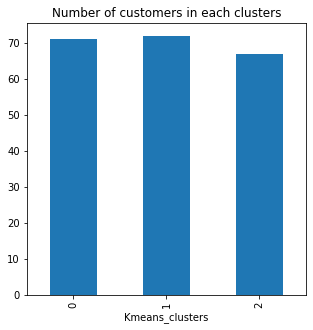

In [66]:
k_clust.plot.bar(stacked=False,figsize=(5,5))
plt.title('Number of customers in each clusters')
plt.xlabel('Kmeans_clusters')
print(k_clust)

# Inference:
### Cluster0 = 71 customers
### Cluster1 = 72 customers
### Cluster2 = 67 customers

# Inference:
#####  After comparing WSS for other values of K - Elbow Method,optimial value of cluster is 3.
##### silhouette_score of 3 clusters = 0.400727
##### silhouette width of 3 clusters = 0.002713

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

# Cluster Profiling
# Hierarchical cluster profiling

In [67]:
clust_profile=bank_df.drop(['Kmeans_clusters',"Agglo_CLusters"],axis=1)
clust_profile=clust_profile.groupby('H_clusters').mean()
clust_profile['freq']=bank_df.H_clusters.value_counts().sort_index()
print(clust_profile.T)

H_clusters                            1          2          3
spending                      18.371429  11.872388  14.199041
advance_payments              16.145429  13.257015  14.233562
probability_of_full_payment    0.884400   0.848072   0.879190
current_balance                6.158171   5.238940   5.478233
credit_limit                   3.684629   2.848537   3.226452
min_payment_amt                3.639157   4.949433   2.612181
max_spent_in_single_shopping   6.017371   5.122209   5.086178
freq                          70.000000  67.000000  73.000000


3    73
1    70
2    67
Name: H_clusters, dtype: int64


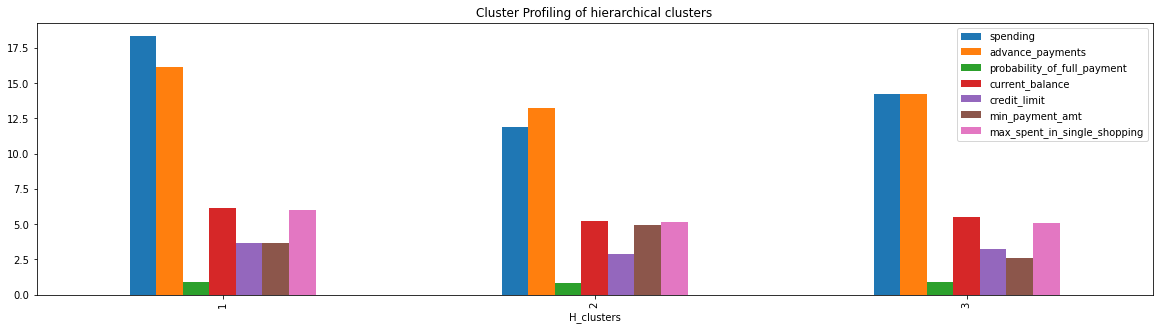

In [68]:
clust_bar=bank_df.drop(['Kmeans_clusters','Agglo_CLusters'],axis=1)
clust=clust_bar.groupby('H_clusters').mean()
clust.plot.bar(stacked=False,figsize=(20,5))
plt.title('Cluster Profiling of hierarchical clusters')
print(h_clust)

# Inference:
## Cluster Profiling of hierarchical clusters:
### Cluster1:
##### 1. There are 70 customers in this cluster
##### 2.Customers spending on average of 18,371.4 which is more than other cluster customers.
##### 3.Advance payment by cash is high .On average they pay 1,614.54 in cash 
##### 4. Probability of full payments is 88.4%
##### 5. These customers maintain high current balance than other two cluster customers
##### 6.These customers spend more in one single purchace which is on average of 6,017.37
####
### Cluster2:
##### 1. There are 67 customers in this cluster
##### 2. These customers spend relatively less and advance payment by cash is very low than the other cluster customers
##### 3. Monthly these customers pay on average of 494.9 as a minimum payment for purchases which is higher than other cluster customers
##### 4.These customers spend more in single purchase than the customers in cluster3
##### 5.Probability of  full payments is 84.8%
#####
### Cluster3:
##### 1. There are 73 customers in this cluster
##### 2. These customers spend moderately with average of 14,199 and advance payment is also in moderate level
##### 3. Here customers maintain current balance with average of 5,478
##### 4. Maximum spending on one purchase is very less

# Agglomerative Cluster Profiling

In [69]:
agglo_data=bank_df.drop(["H_clusters",'Kmeans_clusters'],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq_agglo']=bank_df.Agglo_CLusters.value_counts().sort_index()
agglo_data.T

Agglo_CLusters,0,1,2
spending,11.921045,18.349714,14.175205
advance_payments,13.260448,16.138429,14.237123
probability_of_full_payment,0.850870,0.884027,0.876979
current_balance,5.228910,6.155243,5.490247
credit_limit,2.866597,3.680143,3.214178
min_payment_amt,5.040701,3.723400,2.447633
max_spent_in_single_shopping,5.097881,6.009857,5.115712
Freq_agglo,67.000000,70.000000,73.000000


0    67
1    70
2    73
Name: Agglo_CLusters, dtype: int64


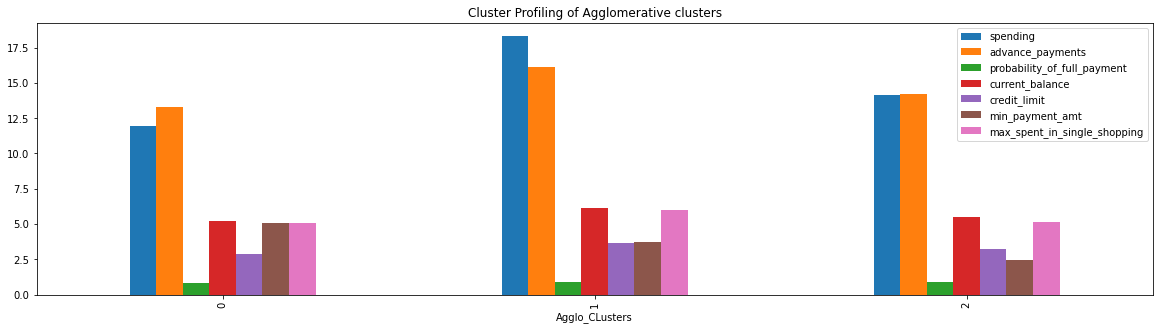

In [70]:
agglo_bar=bank_df.drop(['Kmeans_clusters','H_clusters'],axis=1)
agglo=agglo_bar.groupby('Agglo_CLusters').mean()
agglo.plot.bar(stacked=False,figsize=(20,5))
plt.title('Cluster Profiling of Agglomerative clusters')
print(agglo_clust)

# Inference:
## Cluster Profiling of Agglomerative clusters:
##### 1.Cluster0 consists of low spending and low advance payments customers with low credit limit than other cluster customers. Probability of full payment is 85.0%
##### 2.Cluster1 consists of high spending and high advance payments customers with good credit limit. Probability of full payment is 88.4%
##### 3.Cluster2 consists of medium level spending and medium level advance payment customers with very low minimum payment amount than other cluster customers .Probability of full payment is 87.6%
## Based on comparing hierarchical and Agglomerative clusters, both type of clusters yield same results

# KMeans cluster Profiling

In [71]:
bank_df.Kmeans_clusters.value_counts().sort_index()

0    71
1    72
2    67
Name: Kmeans_clusters, dtype: int64

In [72]:
clust_profile1=bank_df.drop(['H_clusters','Agglo_CLusters'],axis=1)
clust_profile1=clust_profile1.groupby('Kmeans_clusters').mean()
clust_profile1['freq1']=bank_df.Kmeans_clusters.value_counts().sort_index()
print(clust_profile1.T)

Kmeans_clusters                       0          1          2
spending                      14.437887  11.856944  18.495373
advance_payments              14.337746  13.247778  16.203433
probability_of_full_payment    0.881597   0.848253   0.884210
current_balance                5.514577   5.231750   6.175687
credit_limit                   3.259225   2.849542   3.697537
min_payment_amt                2.707341   4.742389   3.632373
max_spent_in_single_shopping   5.120803   5.101722   6.041701
freq1                         71.000000  72.000000  67.000000


0    71
1    72
2    67
Name: Kmeans_clusters, dtype: int64


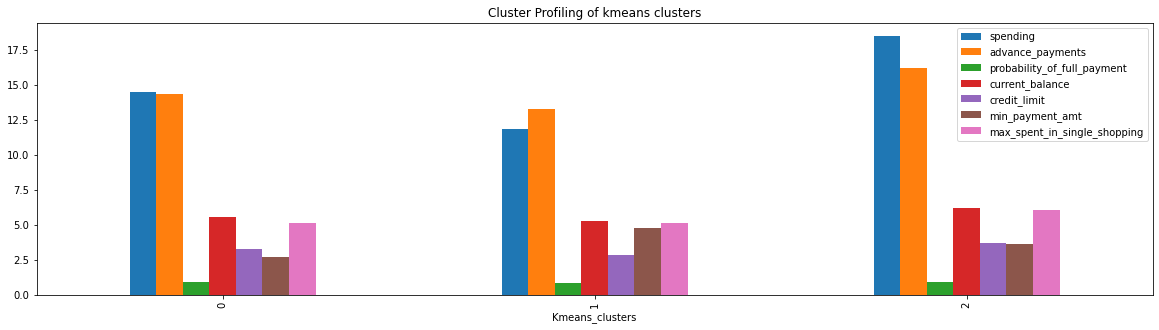

In [73]:
clust1_bar=bank_df.drop(['H_clusters','Agglo_CLusters'],axis=1)
clust1=clust1_bar.groupby('Kmeans_clusters').mean()
clust1.plot.bar(stacked=False,figsize=(20,5))
plt.title('Cluster Profiling of kmeans clusters')
print(k_clust)

# Inference:
## Cluster Profiling of Kmeans clusters:
### K_Cluster0 :
##### 1. There are 71 customers in this cluster
##### 2. These customers moderatively spend on average of 14,437 is in between K_cluster1 and k_cluster2
##### 3. Amount paid in advance is 1,433.7 on average as cash which is slightly higher than K_cluster1
##### 4. The current balance maintained with the average of 5514 to make purchases
##### 5. Probability of full payment is 88.1
#####
### K_Cluster1:
##### 1. There are 72 customers in this cluster
##### 2. These customers spend very less per month compared to K_cluster0 and K_cluster2
##### 3. Minimum amount paid by the customers are high than the other cluster customers
##### 4. They maintain very low credit limit
##### 5. Probability of full payment is 84.8 which is very lowest of all clusters
#####
### K_Cluster2:
##### 1. There are 67 customers in this cluster
##### 2. These customer spend on average of 18,495 and amount paid is relatively higher than other two Cluster customers
##### 3. They maintain high current balance 
##### 4. They have high credit limit inspite of spending more 
##### 5. On average, they spend 6,041 on one purchase

# Recommendations:
####  Based on cluster analysis,mainly three group of clusters are formed.They are low,mediumand high levels of spending customers.
## promotional strategies for low level spending customers:
#### 1.Make shopping more rewarding
#### 2. E-voucher for dining,movie, online shopping
#### 3. points for groceries shopping,supermarkets ,etc
## promotional strategies for medium level spending customers:
#### 1.E- voucher for Festive offers,dining,movie, online shopping
#### 2.Discounts in health and fitness membership,apparel shopping
#### 3.Pay with points
## promotional strategies for medium level spending customers:
#### 1.Upgrade the creditcard like platinium or titanium card
#### 2. Accelerated reward points on birthday shopping,International purchases
#### 3.Redemption options
#### 4.Quick cash using credit card

# Problem 2: CART-RF-ANN
### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.
# Attribute Information:
#### 1. Target: Claim Status (Claimed)
#### 2. Code of tour firm (Agency_Code)
#### 3. Type of tour insurance firms (Type)
#### 4. Distribution channel of tour insurance agencies (Channel)
#### 5. Name of the tour insurance products (Product)
#### 6. Duration of the tour (Duration)
#### 7. Destination of the tour (Destination)
#### 8. Amount of sales of tour insurance policies (Sales)
#### 9. The commission received for tour insurance firm (Commission)
#### 10. Age of insured (Age)


# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [2]:
ins_df = pd.read_csv('insurance_part2_data-2.csv')

In [3]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
print('The number of rows of the dataframe is',ins_df.shape[0],'.')
print('The number of columns of the dataframe is',ins_df.shape[1],'.')

The number of rows of the dataframe is 3000 .
The number of columns of the dataframe is 10 .


In [5]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


# Inference:

##### There are no null values
##### There are 3000 entries and 10 columns


In [6]:
ins_df.dtypes.value_counts()

object     6
float64    2
int64      2
dtype: int64

# Inference:

##### There are 6 object variables, 2 float and 2 int variables

In [7]:
ins_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

# Inference:
##### There are no null values

In [8]:
ins_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Inference:
##### There are outliers in most of the variables
##### Most travellers used travel agency as type of insurance firms
##### Mostly online distribution channel is used by travellers
##### Costomised plan is mostly perferred by the travellers
##### Most travelled destination is ASIA

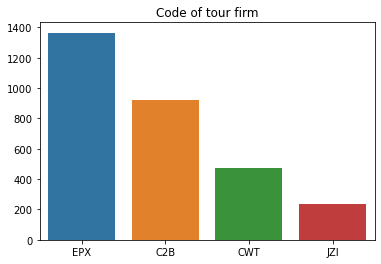

EPX    0.455000
C2B    0.308000
CWT    0.157333
JZI    0.079667
Name: Agency_Code, dtype: float64


In [9]:
sns.barplot(ins_df.Agency_Code.value_counts().index,ins_df.Agency_Code.value_counts().values)
plt.title('Code of tour firm')
plt.show()
print(ins_df.Agency_Code.value_counts(normalize=True))

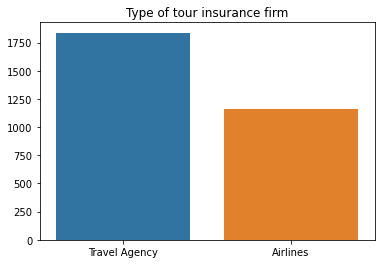

Travel Agency    0.612333
Airlines         0.387667
Name: Type, dtype: float64


In [10]:
sns.barplot(ins_df.Type.value_counts().index,ins_df.Type.value_counts().values)
plt.title('Type of tour insurance firm')
plt.show()
print(ins_df.Type.value_counts(normalize=True))

# Inference:
# Most travellers used travel agency as type of insurance firms

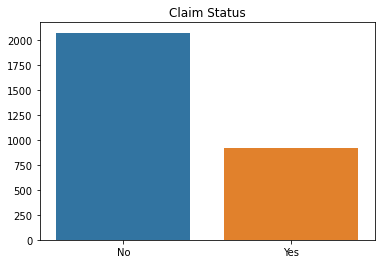

No     0.692
Yes    0.308
Name: Claimed, dtype: float64


In [11]:
sns.barplot(ins_df.Claimed.value_counts().index,ins_df.Claimed.value_counts().values)
plt.title('Claim Status')
plt.show()
print(ins_df.Claimed.value_counts(normalize=True))

# Inference:
# Nearly 69% travellers have not claimed the insurance
# Only 31% travellers have claimed the insurance

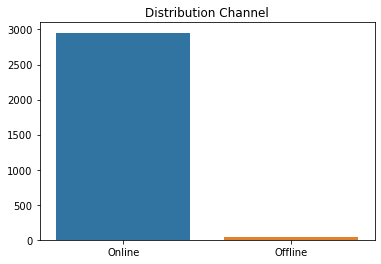

Online     0.984667
Offline    0.015333
Name: Channel, dtype: float64


In [12]:
sns.barplot(ins_df.Channel.value_counts().index,ins_df.Channel.value_counts().values)
plt.title('Distribution Channel')
plt.show()
print(ins_df.Channel.value_counts(normalize=True))

# Inference:
# Mostly online distribution channel is used by travellers

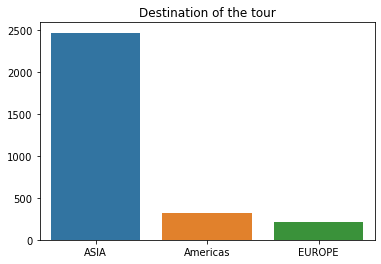

ASIA        0.821667
Americas    0.106667
EUROPE      0.071667
Name: Destination, dtype: float64


In [13]:


sns.barplot(ins_df.Destination.value_counts().index,ins_df.Destination.value_counts().values)
plt.title('Destination of the tour')
plt.show()
print(ins_df.Destination.value_counts(normalize=True))

# Inference:
# Most travelled destination is ASIA

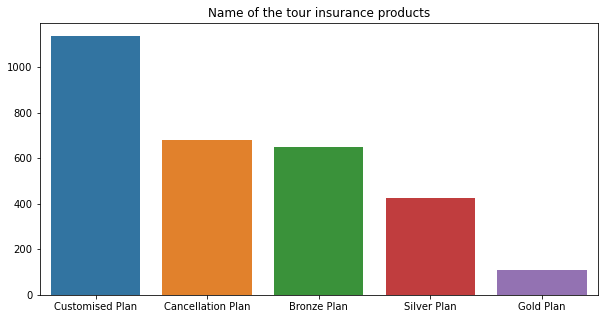

Customised Plan      0.378667
Cancellation Plan    0.226000
Bronze Plan          0.216667
Silver Plan          0.142333
Gold Plan            0.036333
Name: Product Name, dtype: float64


In [14]:
plt.figure(figsize=(10,5))
sns.barplot(ins_df['Product Name'].value_counts().index,ins_df['Product Name'].value_counts().values)
plt.title('Name of the tour insurance products')


plt.show()
print(ins_df['Product Name'].value_counts(normalize=True))

# Inference:
# Customised plan is mostly perferred by the travellers

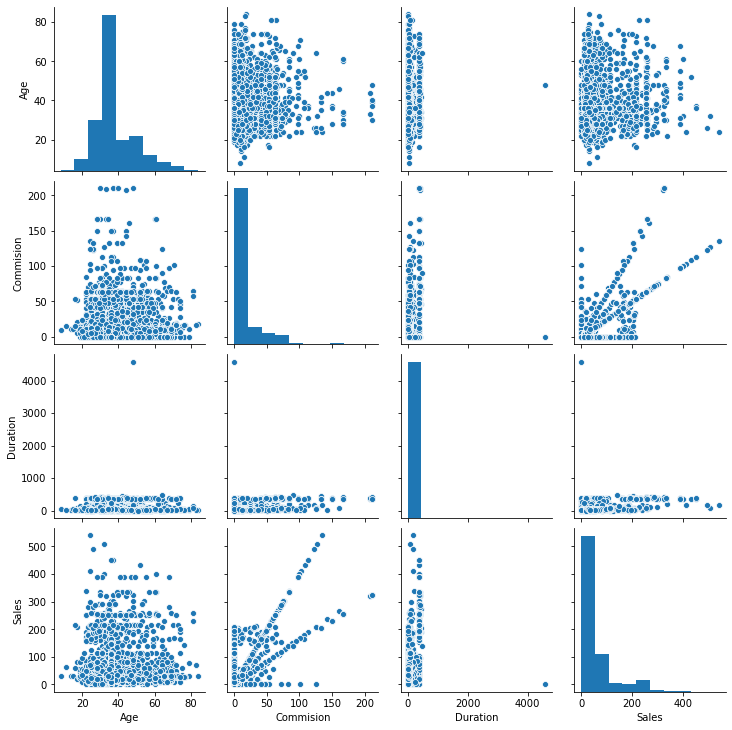

In [15]:
sns.pairplot(ins_df)

# Inference:
# most of variables is left skewed

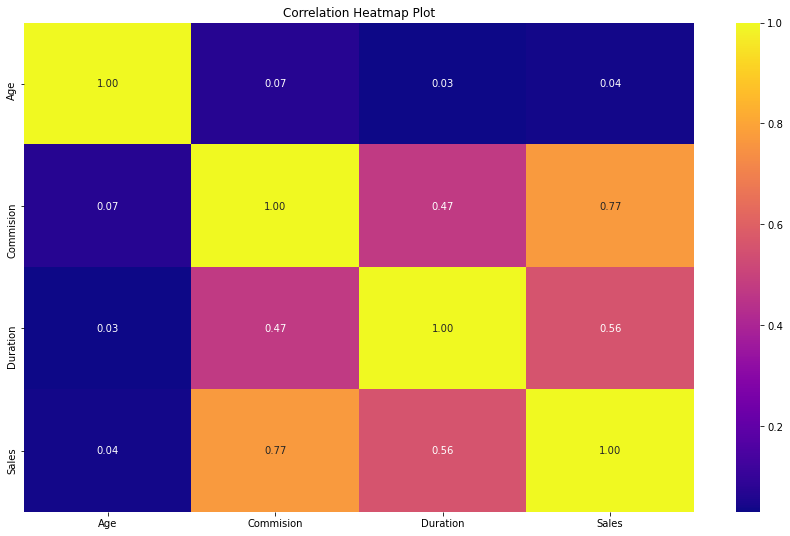

In [16]:
plt.figure(figsize=(15,9))
sns.heatmap(round(ins_df.corr(),2),fmt='.2f',annot=True,cmap='plasma')
plt.title('Correlation Heatmap Plot')
plt.show()

# Inference:
# Commision and sales are postively correlated

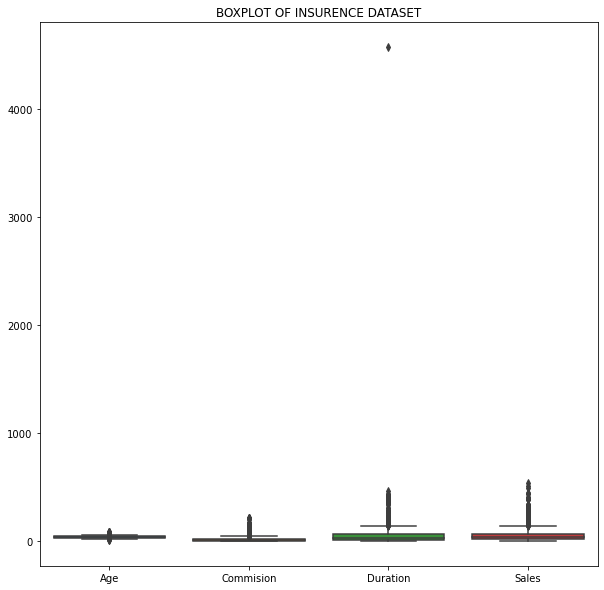

In [17]:
plt.subplots(figsize=(10,10))
plt.title('BOXPLOT OF INSURENCE DATASET')
sns.boxplot(data=ins_df,orient="v")
plt.show()

# Inference:
# There are outliers

In [18]:
ins_df.duplicated().sum()

139

In [19]:

dups = ins_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

ins_df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [20]:
ins_df.drop_duplicates(inplace=True) 

# Inference:
#### There are duplicates in the dataset

In [21]:

dups = ins_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

ins_df[dups]

Number of duplicate rows = 0


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [22]:
for feature in ins_df.columns: 
    if ins_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ins_df[feature].unique()))
        print(pd.Categorical(ins_df[feature].unique()).codes)
        ins_df[feature] = pd.Categorical(ins_df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [23]:
ins_df.Claimed.value_counts(normalize= True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

# Inference:
# Here 0 = No (not claimed )
#      1 = Yes(claimed)

In [24]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.5 KB


# Inference:
#### object variables is converted in integer

In [25]:
ins_df.Commision.value_counts()

0.00     1239
23.76      61
54.00      59
63.21      59
7.70       57
         ... 
67.75       1
17.29       1
18.13       1
49.40       1
0.18        1
Name: Commision, Length: 324, dtype: int64

In [26]:
ins_df.Sales.value_counts()

20.00     172
10.00     122
22.00      79
252.85     57
216.00     57
         ... 
199.00      1
177.00      1
171.00      1
206.60      1
271.00      1
Name: Sales, Length: 380, dtype: int64

In [27]:
for feature in ins_df.columns: 
    if ins_df[feature].dtype == 'float': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ins_df[feature].unique()))
        print(pd.Categorical(ins_df[feature].unique()).codes)
        ins_df[feature] = pd.Categorical(ins_df[feature]).codes



feature: Commision
[0.70, 0.00, 5.94, 6.30, 15.75, ..., 149.50, 13.75, 12.00, 71.85, 13.50]
Length: 324
Categories (324, float64): [0.00, 0.05, 0.09, 0.14, ..., 166.53, 208.00, 208.16, 210.21]
[ 15   0  56  62 141 235 256 142  55 193 267 273 161 151  61 130 204  77
 136 175  93 143  72  35 241 105  79 277 248  75  99 189 258 186  46  66
 107 265  49  86  85 296  10 207  16  58 266 113 155 170 158 294 109 121
 317 219 210 214  44  54 246 172 262  42 259  50 128 184 306 295 257 286
 281 238  47 137  38 112 313  91 323 224  32  40  98 159 290   8 195  52
 115 304  36  60 120  57 282 196 119 185 291 300  65 217 140 205  11 305
 165 191 288 308 190 236 322 125  20 285 180  84  94 169 270  26  18 310
 106 138 182 176  70  51 200 178  45 274 320  43  73  88 309  30 302 100
 153 229 206 242 293  29 230   6 145 287 234  80 311 102 203 164 131 292
 239  53  90 147 199 227 104  59 152 150 212  23  14 215   1 264  21  69
 148  25 275 181 316 276 254 243 315   4  64 198 157 280  95   9  41 240
 2

In [28]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           2861 non-null   int64
 1   Agency_Code   2861 non-null   int8 
 2   Type          2861 non-null   int8 
 3   Claimed       2861 non-null   int8 
 4   Commision     2861 non-null   int16
 5   Channel       2861 non-null   int8 
 6   Duration      2861 non-null   int64
 7   Sales         2861 non-null   int16
 8   Product Name  2861 non-null   int8 
 9   Destination   2861 non-null   int8 
dtypes: int16(2), int64(2), int8(6)
memory usage: 95.0 KB


# Inference:
##### All the variables converted into integer

In [29]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,15,1,7,15,2,0
1,36,2,1,0,0,1,34,60,2,0
2,39,1,1,0,56,1,3,35,2,1
3,36,2,1,0,0,1,4,85,1,0
4,33,3,0,0,62,1,53,53,0,0


In [30]:

X = ins_df.drop("Claimed" , axis=1)

y = ins_df.pop("Claimed")


# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [32]:
# Checking dimensions on the train and test data
print('x_train: ',X_train.shape)
print('x_test: ',X_test.shape)
print('y_train: ',train_labels.shape)
print('y_test: ',test_labels.shape)

x_train:  (2002, 9)
x_test:  (859, 9)
y_train:  (2002,)
y_test:  (859,)


# Inference:
##### spilting the dataset into train and test set to build classification model (70:30)

# Decision tree - CART

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [35]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [36]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ins_Tree_File = open('C:\\Users\\sugan\\PROJECT\\ins_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=ins_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

ins_Tree_File.close()

In [37]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.199544
Agency_Code   0.168988
Type          0.000000
Commision     0.073729
Channel       0.003908
Duration      0.269423
Sales         0.226053
Product Name  0.033328
Destination   0.025028


In [38]:
y_predict = dt_model.predict(X_test)

# Inference:
##### For Decision tree model,  DecisionTreeClassifier is used for modeling

# Regularising the Decision Tree

### Adding Tuning Parameters

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    
    'max_depth': [10,15,20],
    'max_features': [3,4,5,6],
    'min_samples_leaf': [3,4,5,6,7],
    'min_samples_split': [4, 6,7,8]
   
}

dt_model = DecisionTreeClassifier(random_state=1)
#cv cross validation
grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 5)

In [40]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'min_samples_split': [4, 6, 7, 8]})

In [41]:
cart_best_grid = grid_search.best_estimator_

In [42]:
cart_best_grid

DecisionTreeClassifier(max_depth=10, max_features=5, min_samples_leaf=5,
                       min_samples_split=4, random_state=1)

In [43]:
cart_best_grid.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=10, max_features=5, min_samples_leaf=5,
                       min_samples_split=4, random_state=1)

# Generating New Tree

In [44]:
ins_tree_regularized = open('C:\\Users\\sugan\\PROJECT\\ins_tree_regularized.dot','w')
dot_data = tree.export_graphviz(cart_best_grid, out_file= ins_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ins_tree_regularized.close()



# Inference 
##### we build the tree using best grid from GridsearchCV

# Variable Importance

In [45]:
print(pd.DataFrame(cart_best_grid.feature_importances_, columns=["IMP"],index = X_train.columns).sort_values('IMP',ascending =False))

                   IMP
Agency_Code   0.361695
Sales         0.217361
Duration      0.139983
Commision     0.121831
Age           0.105200
Product Name  0.038207
Destination   0.015385
Channel       0.000337
Type          0.000000


# Inference :
### DecisionTreeClassifier
###### A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.
##### Using GridsearchCV, we input various parameters like max_depth,max_features,min_samples,min_sample_split which will helps us to find best grid for prediction of the better model
##### max_depth: The maximum depth of the tree
##### min_samples_split: The minimum number of samples required to split an internal node
##### min_samples_leaf: The minimum number of samples required to be at a leaf node. 
##### max_features: The number of features to consider when looking for the best split
##### random_state: Controls the randomness of the estimator.
##### criterion : The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
##### best grid:DecisionTreeClassifier(max_depth=10, max_features=5, min_samples_leaf=5,min_samples_split=4, random_state=1)
##### Best grid shows which variable is important.In this dataset, Agency_Code is more important feature
##### Next important features are Sales and Duration

# CART- Predicting on Training and Test dataset

In [46]:
dt_ytrain_predict = cart_best_grid.predict(X_train)
dt_ytest_predict = cart_best_grid.predict(X_test)

In [47]:
print('dt_ytrain_predict',dt_ytrain_predict.shape)
print('dt_ytest_predict',dt_ytest_predict.shape)

dt_ytrain_predict (2002,)
dt_ytest_predict (859,)


In [48]:
cart_best_grid.score(X_train,train_labels)

0.8281718281718282

In [49]:
cart_best_grid.score(X_test,test_labels)

0.7450523864959255

# Inference:
##### Test score of train data : 0.828
##### Test score of test data : 0.745

# Getting the Predicted Classes

In [50]:
dt_ytest_predict

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,

# Getting the Predicted Probabilities

In [51]:
ytest_predict_prob=cart_best_grid.predict_proba(X_test)
ytest_predict_prob

array([[0.        , 1.        ],
       [0.97959184, 0.02040816],
       [0.17777778, 0.82222222],
       ...,
       [0.55555556, 0.44444444],
       [1.        , 0.        ],
       [0.44444444, 0.55555556]])

In [52]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.000000,1.000000
1,0.979592,0.020408
2,0.177778,0.822222
3,1.000000,0.000000
4,0.400000,0.600000


# Random Forest model

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfcl = RandomForestClassifier(n_estimators = 201,max_features=5,random_state=1 , oob_score = True )
rfcl = rfcl.fit(X_train, train_labels)

In [55]:
rfcl

RandomForestClassifier(max_features=5, n_estimators=201, oob_score=True,
                       random_state=1)

In [56]:
rfcl.oob_score_

0.7282717282717283

In [57]:
(1-rfcl.oob_score_)*100 

27.172827172827173

In [58]:
print(pd.DataFrame(rfcl.feature_importances_, columns=["IMP"],index = X_train.columns).sort_values('IMP',ascending =False))

                   IMP
Duration      0.255095
Sales         0.212197
Age           0.181567
Agency_Code   0.121796
Commision     0.109421
Product Name  0.080310
Destination   0.023487
Type          0.009865
Channel       0.006262


# Predicting Train and Test data with the RF Model

In [59]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

# Train Accuracy

In [60]:
rfcl.score(X_train,train_labels)

0.9955044955044955

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
'max_depth': [10, 20],
'min_samples_leaf': [3, 4,5,7],
'min_samples_split': [4, 6,7,8],
'n_estimators': [100, 200],
}
 
rfcl = RandomForestClassifier(random_state=1)
#cv cross validation
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [62]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'bootstrap': [True], 'max_depth': [10, 20],
                         'min_samples_leaf': [3, 4, 5, 7],
                         'min_samples_split': [4, 6, 7, 8],
                         'n_estimators': [100, 200]})

In [63]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 200}

In [64]:
best_grid = grid_search.best_estimator_

In [65]:
best_grid

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=200, random_state=1)

In [66]:
RF_ytrain_predict = best_grid.predict(X_train)
RF_ytest_predict = best_grid.predict(X_test)

In [67]:
best_grid.score(X_train, train_labels)

0.8316683316683317

In [68]:
best_grid.score(X_test, test_labels)

0.7857974388824214

In [69]:
print(pd.DataFrame(best_grid.feature_importances_, columns=["IMP"],index = X_train.columns).sort_values('IMP',ascending =False))

                   IMP
Sales         0.206312
Agency_Code   0.179092
Product Name  0.152201
Duration      0.149934
Commision     0.141171
Age           0.110455
Type          0.035787
Destination   0.020322
Channel       0.004727


# Inference:
# RandomForestClassifier
##### Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm.Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.
##### Using GridsearchCV, we input various parameterslike max_depth,max_features,min_samples,min_sample_split which will helps us to find best grid for prediction of the better model
##### best grid: RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4,n_estimators=200, random_state=1)
##### Best grid shows which variable is important.In this dataset, Sales is more important feature
##### Next important features are Agency_Code,Product
##### Test score of train data : 0.83
##### Test score of test data : 0.79

# ANN

# scaling the data for ANN

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
sc = StandardScaler()

In [72]:
ann_x_train = sc.fit_transform(X_train)

In [73]:
ann_x_train

array([[ 2.88764239, -1.2626112 , -1.19813318, ..., -0.92157015,
        -1.31338076, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.28057367,
         0.24339146, -0.44775345],
       [ 2.04101412, -0.27289013,  0.83463176, ...,  0.51252368,
         0.24339146,  1.24676906],
       ...,
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.97589189,
        -0.53499465, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  1.19697755,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  1.19697755,
         0.24339146,  1.24676906]])

In [74]:
ann_x_test = sc.transform(X_test)

In [75]:
ann_x_test

array([[-0.68701032, -0.27289013,  0.83463176, ...,  1.023148  ,
         0.24339146, -0.44775345],
       [ 2.79357258,  0.71683095,  0.83463176, ..., -0.44353887,
        -0.53499465, -0.44775345],
       [ 0.34775757, -1.2626112 , -1.19813318, ...,  0.8167254 ,
         1.80016368, -0.44775345],
       ...,
       [ 1.19438584, -1.2626112 , -1.19813318, ..., -0.9107058 ,
        -1.31338076, -0.44775345],
       [ 1.38252546,  0.71683095,  0.83463176, ..., -0.75860494,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.75860494,
         0.24339146, -0.44775345]])

In [76]:
from sklearn.neural_network import MLPClassifier

In [77]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=1500,activation='relu',
                     solver='sgd', verbose=True,  random_state=1,tol=0.01)

In [78]:
clf.fit(ann_x_train, train_labels)
label_pred = clf.predict(ann_x_test)

Iteration 1, loss = 0.72226253
Iteration 2, loss = 0.69830173
Iteration 3, loss = 0.66932895
Iteration 4, loss = 0.64645161
Iteration 5, loss = 0.62853958
Iteration 6, loss = 0.61291230
Iteration 7, loss = 0.59808988
Iteration 8, loss = 0.58589570
Iteration 9, loss = 0.57646178
Iteration 10, loss = 0.57010403
Iteration 11, loss = 0.56399859
Iteration 12, loss = 0.55821563
Iteration 13, loss = 0.55322397
Iteration 14, loss = 0.54910588
Iteration 15, loss = 0.54622631
Iteration 16, loss = 0.54336174
Iteration 17, loss = 0.54068864
Iteration 18, loss = 0.53804522
Iteration 19, loss = 0.53530930
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [79]:
ann_predict = clf.predict(ann_x_train)
ann_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [80]:
clf.score(ann_x_train, train_labels)

0.7482517482517482

In [81]:
clf.score(ann_x_test, test_labels)

0.7555296856810244

# Model Tuning through Grid Search

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [100,200,300,400],
    'max_iter': [1000,2000],
    'solver': ['sgd','adam'],
    'tol': [0.01,0.001],
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [83]:
grid_search.fit(ann_x_train, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [100, 200, 300, 400],
                         'max_iter': [1000, 2000], 'solver': ['sgd', 'adam'],
                         'tol': [0.01, 0.001]})

In [84]:
grid_search.best_params_

{'hidden_layer_sizes': 300, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.001}

In [85]:
best_grid_ann = grid_search.best_estimator_

In [86]:
best_grid_ann

MLPClassifier(hidden_layer_sizes=300, max_iter=1000, random_state=1, tol=0.001)

In [87]:
ytrain_predict1 = best_grid_ann.predict(ann_x_train)
ytest_predict1 = best_grid_ann.predict(ann_x_test)

In [88]:
best_grid_ann.score(ann_x_train,train_labels)

0.7672327672327672

In [89]:
best_grid_ann.score(ann_x_test,test_labels)

0.7741559953434226

# Inference:
#  Multi-layer Perceptron classifier.
#### This model optimizes the log-loss function using LBFGS or stochastic gradient descent.
##### Using GridsearchCV, we input various parameters like 'hidden_layer_sizes', 'max_iter', 'solver','tol'which will helps us to find best grid for prediction of the better model
##### hidden_layer_sizes:The ith element represents the number of neurons in the ith hidden layer.
##### activation: Activation function for the hidden layer.(default:'relu')
##### solver default=’adam’: The solver for weight optimization.
##### max_iter:Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. 
##### tol:Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.

##### best grid: MLPClassifier(hidden_layer_sizes=300, max_iter=1000, random_state=1, tol=0.001)

##### Test score of train data : 0.77
##### Test score of test data : 0.77

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

In [90]:
from sklearn.metrics import confusion_matrix,classification_report

# Decision Tree- CART

# CART- Predicting on Training and Test dataset

In [91]:
dt_ytrain_predict =cart_best_grid.predict(X_train)
dt_ytest_predict =cart_best_grid.predict(X_test)

# Model Evaluation

# Measuring AUC-ROC Curve

In [92]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

In [93]:
import matplotlib.pyplot as plt

# Trained data

# Train Data Accuracy


In [94]:
cart_train_score = cart_best_grid.score(X_train,train_labels)
print('Accuracy score of cart_train_data:',cart_train_score)

Accuracy score of cart_train_data: 0.8281718281718282


# Confusion Matrix for the training data

In [95]:
from sklearn.metrics import classification_report,confusion_matrix

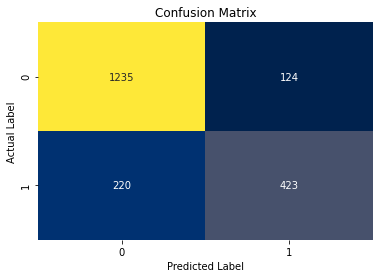

In [96]:
confusion_matrix(train_labels, dt_ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,dt_ytrain_predict),annot=True, fmt='d',cbar=False, cmap='cividis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Inference:
# CART Trained data
##### True Positve:
###### Actual and predict claim status is yes -423 customers
##### True Negative: 
###### Actual and predict claim status is no - 1235 customers
##### False Postive:
##### Actual claim status is no, but predict claim status is yes - 124 customers
##### False Negative:
##### Actual claim status is yes, but predict claim status is no- 220 customers

In [97]:
print(classification_report(train_labels, dt_ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1359
           1       0.77      0.66      0.71       643

    accuracy                           0.83      2002
   macro avg       0.81      0.78      0.79      2002
weighted avg       0.82      0.83      0.82      2002



In [98]:
cart_metrics=classification_report(train_labels, dt_ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()

cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.77
cart_train_recall  0.66
cart_train_f1  0.71


# Classification Report of Train data

# AUC and ROC for the CART training data

Cart_train_AUC: 0.896


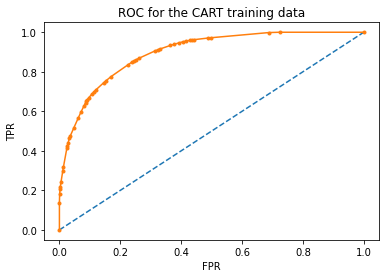

In [99]:
# predict probabilities
probs = cart_best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
Cart_train_AUC = roc_auc_score(train_labels, probs)
print('Cart_train_AUC: %.3f' % Cart_train_AUC)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC for the CART training data')
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the plot
plt.show()

# Test data

# Test Data Accuracy 

In [100]:
cart_test_score = cart_best_grid.score(X_test,test_labels)
print('Accuracy score of cart_test_data:',cart_test_score)

Accuracy score of cart_test_data: 0.7450523864959255


# Confusion Matrix for test data

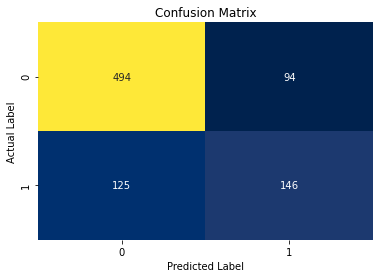

In [101]:
confusion_matrix(test_labels, dt_ytest_predict)
sns.heatmap(confusion_matrix(test_labels, dt_ytest_predict),annot=True, fmt='d',cbar=False, cmap='cividis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Inference:
# CART test data
##### True Positve:
###### Actual and predict claim status is yes -146 customers
##### True Negative: 
###### Actual and predict claim status is no - 494 customers
##### False Postive:
##### Actual claim status is no, but predict claim status is yes - 94 customers
##### False Negative:
##### Actual claim status is yes, but predict claim status is no- 125 customers

# Classification Report of Test data

In [102]:
print(classification_report(test_labels, dt_ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       588
           1       0.61      0.54      0.57       271

    accuracy                           0.75       859
   macro avg       0.70      0.69      0.69       859
weighted avg       0.74      0.75      0.74       859



# AUC and ROC for the CART test data

Cart_test_AUC: 0.742


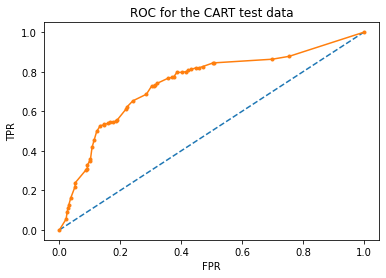

In [103]:
# predict probabilities
probs = cart_best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
Cart_test_AUC = roc_auc_score(test_labels, probs)
print('Cart_test_AUC: %.3f' % Cart_test_AUC)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC for the CART test data')
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the plot
plt.show()

In [104]:
cart_metrics=classification_report(test_labels,dt_ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.61
cart_test_recall  0.54
cart_test_f1  0.57


# CART  MODEL CONCLUSION

# Train Data:
### AUC: 90%
### Accuracy: 83%
### Precision: 77%
### Recall: 66%
### f1-Score: 71%

# Test Data:
### AUC: 74%
### Accuracy: 75%
### Precision: 61%
### Recall: 54%
### f1-Score: 57%

#### Training and Test set results are not similar,this proves ,there may be overfitting
#### Agency_Code  is the most important variable for predicting claim status 

# Random Forest Classifier

# Predicting on Training and Test dataset

In [105]:
RF_ytrain_predict = best_grid.predict(X_train)
RF_ytest_predict = best_grid.predict(X_test)

# Train Data Accuracy

In [106]:
RF_train_score = best_grid.score(X_train,train_labels)
print('Accuracy score of Random_Forest_train_data:',RF_train_score)

Accuracy score of Random_Forest_train_data: 0.8316683316683317


# Confusion Matrix for the training data

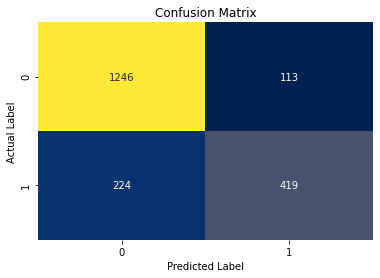

In [107]:
confusion_matrix(train_labels, RF_ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,RF_ytrain_predict),annot=True, fmt='d',cbar=False, cmap='cividis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Inference:
# Random Forest Trained data
##### True Positve:
###### Actual and predict claim status is yes - 419 customers
##### True Negative: 
###### Actual and predict claim status is no - 1246 customers
##### False Postive:
##### Actual claim status is no, but predict claim status is yes - 113 customers
##### False Negative:
##### Actual claim status is yes, but predict claim status is no- 224 customers

# Classification Report of Training data

In [108]:
print(classification_report(train_labels, RF_ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1359
           1       0.79      0.65      0.71       643

    accuracy                           0.83      2002
   macro avg       0.82      0.78      0.80      2002
weighted avg       0.83      0.83      0.83      2002



# AUC and ROC for the Random Forest training data


rf_train_AUC: 0.910


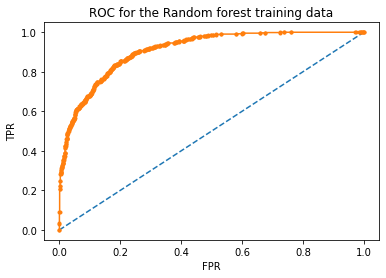

In [111]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_train_AUC = roc_auc_score(train_labels, probs)
print('rf_train_AUC: %.3f' % rf_train_AUC)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC for the Random forest training data')
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the plot
plt.show()

In [112]:
rf_metrics=classification_report(train_labels, RF_ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.79
rf_train_recall  0.65
rf_train_f1  0.71


# Test Data Accuracy

In [113]:
RF_test_score = best_grid.score(X_test,test_labels)
print('Accuracy score of Random_Forest_test_data:',RF_test_score)

Accuracy score of Random_Forest_test_data: 0.7857974388824214


# Confusion Matrix for the test data

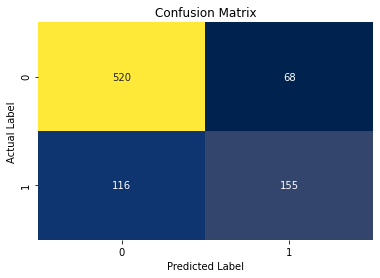

In [114]:
confusion_matrix(test_labels, RF_ytest_predict)
sns.heatmap(confusion_matrix(test_labels,RF_ytest_predict),annot=True, fmt='d',cbar=False, cmap='cividis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Inference:
# Random Forest Test data
##### True Positve:
###### Actual and predict claim status is yes -155 customers
##### True Negative: 
###### Actual and predict claim status is no - 520 customers
##### False Postive:
##### Actual claim status is no, but predict claim status is yes - 68 customers
##### False Negative:
##### Actual claim status is yes, but predict claim status is no- 116 customers

# Classification Report of Test data

In [115]:
print(classification_report(test_labels, RF_ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       588
           1       0.70      0.57      0.63       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



# AUC and ROC for the Random Forest test data

rf_test_AUC: 0.819


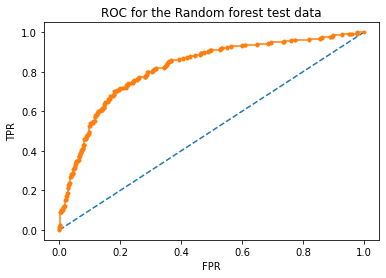

In [116]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_test_AUC = roc_auc_score(test_labels, probs)
print('rf_test_AUC: %.3f' % rf_test_AUC)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.title('ROC for the Random forest test data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [117]:
rf_metrics=classification_report(test_labels, RF_ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.7
rf_test_recall  0.57
rf_test_f1  0.63


# RANDOM FOREST MODEL CONCLUSION:


# Train Data:
### AUC: 91%
### Accuracy: 83%
### Recall: 65%
### Precision: 79%
### f1-Score: 71%

# Test Data:
### AUC: 82%
### Accuracy: 79%
### Recall: 57%
### Precision: 70%
### f1-Score: 63%

#### Training and Test set results have different outcomes,this proves ,there may have overfitting 

#### Here also,Agency_Code  is the most important variable for predicting claim status 

# ANN model

# Predicting on Training and Test dataset

In [118]:
ytrain_predict1 = best_grid_ann.predict(ann_x_train)
ytest_predict1 = best_grid_ann.predict(ann_x_test)

# Train Data Accuracy

In [119]:
ann_train_score = best_grid_ann.score(ann_x_train,train_labels)
print('Accuracy score of Ann_train_data:',ann_train_score)

Accuracy score of Ann_train_data: 0.7672327672327672


# Confusion Matrix for the training data

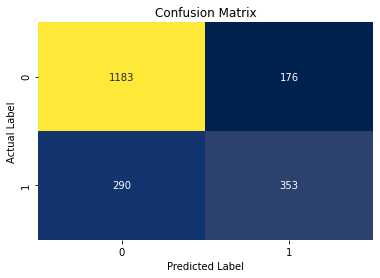

In [120]:
confusion_matrix(train_labels, ytrain_predict1)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict1),annot=True, fmt='d',cbar=False, cmap='cividis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Inference:
# Artifical Neural Network Trained data
##### True Positve:
###### Actual and predict claim status is yes -353 customers
##### True Negative: 
###### Actual and predict claim status is no - 1183 customers
##### False Postive:
##### Actual claim status is no, but predict claim status is yes - 176 customers
##### False Negative:
##### Actual claim status is yes, but predict claim status is no- 290 customers

# Classification Report of Training data

In [121]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1359
           1       0.67      0.55      0.60       643

    accuracy                           0.77      2002
   macro avg       0.74      0.71      0.72      2002
weighted avg       0.76      0.77      0.76      2002



# AUC and ROC for the ANN training data

ann_train_AUC: 0.809


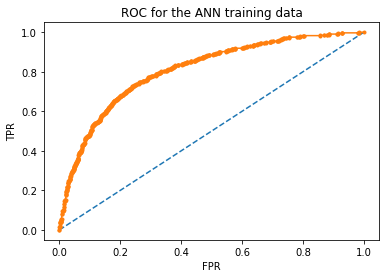

In [122]:
# predict probabilities
probs = best_grid_ann.predict_proba(ann_x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ann_train_AUC = roc_auc_score(train_labels, probs)
print('ann_train_AUC: %.3f' % ann_train_AUC)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.title('ROC for the ANN training data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [123]:
nn_metrics=classification_report(train_labels, ytrain_predict1,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.55
nn_train_f1  0.6


# Test Data Accuracy

In [124]:
ann_test_score = best_grid_ann.score(ann_x_test,test_labels)
print('Accuracy score of Ann_test_data:',ann_test_score)

Accuracy score of Ann_test_data: 0.7741559953434226


# Classification Report of Test data

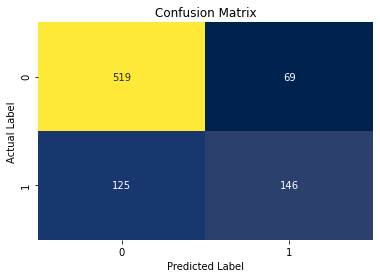

In [125]:
confusion_matrix(test_labels, ytest_predict1)
sns.heatmap(confusion_matrix(test_labels, ytest_predict1),annot=True, fmt='d',cbar=False, cmap='cividis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Inference:
# Artifical Neural Network Test data
##### True Positve:
###### Actual and predict claim status is yes -146 customers
##### True Negative: 
###### Actual and predict claim status is no - 519 customers
##### False Postive:
##### Actual claim status is no, but predict claim status is yes - 69 customers
##### False Negative:
##### Actual claim status is yes, but predict claim status is no- 125 customers

# Classification Report of Test data

In [126]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       588
           1       0.68      0.54      0.60       271

    accuracy                           0.77       859
   macro avg       0.74      0.71      0.72       859
weighted avg       0.77      0.77      0.77       859



# AUC and ROC for the ANN test data

ann_test_AUC: 0.813


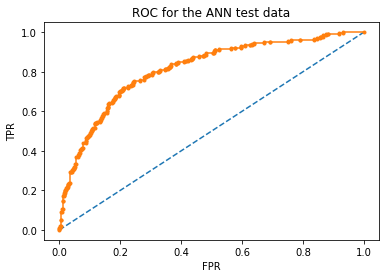

In [127]:
# predict probabilities
probs = best_grid_ann.predict_proba(ann_x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ann_test_AUC = roc_auc_score(test_labels, probs)
print('ann_test_AUC: %.3f' % ann_test_AUC)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC for the ANN test data')
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the plot
plt.show()

In [128]:
nn_metrics=classification_report(test_labels, ytest_predict1,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.68
nn_test_recall  0.54
nn_test_f1  0.6


# Artifical Neural Network

# Train Data:
### AUC: 81%
### Accuracy: 77%
### Recall: 55%
### Precision: 67%
### f1-Score: 60%

# Test Data:
### AUC: 80%
### Accuracy: 77%
### Precision: 69%
### f1-Score: 57%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting
#### The Precision and Recall metrics also almost similiar between training and test set.


# 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

# Comparison of the performance metrics from the 3 models

In [129]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_score,Cart_train_AUC,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_score,Cart_test_AUC,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[RF_train_score,rf_train_AUC,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[RF_test_score,rf_test_AUC,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[ann_train_score,ann_test_AUC,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[ann_test_score,ann_test_AUC,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.83,0.75,0.83,0.79,0.77,0.77
AUC,0.90,0.74,0.91,0.82,0.81,0.81
Recall,0.66,0.54,0.65,0.57,0.55,0.54
Precision,0.77,0.61,0.79,0.70,0.67,0.68
F1 Score,0.71,0.57,0.71,0.63,0.60,0.60


In [130]:

models_names={cart_best_grid:'DecisionTreeClassifier',best_grid:'RandomForestClassifier',best_grid_ann:'ANN'}

# ROC Curve for the 3 models on the Training data

Area under the curve for Decision Tree Classification Model is 0.8963754109748157
Area under the curve for Random Forest Classification Model is 0.9102927662710553
Area under the curve for Artificial Neural Network Model is 0.8088310520154217


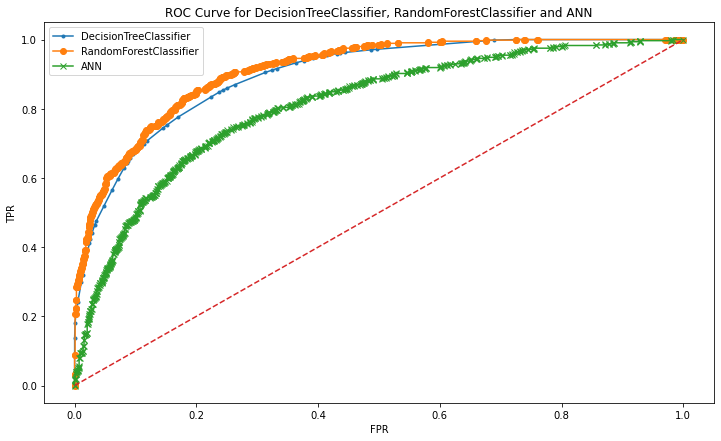

In [131]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(train_labels,cart_best_grid.predict_proba(X_train)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(train_labels,best_grid_ann.predict_proba(ann_x_train)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(train_labels, cart_best_grid.predict_proba(X_train)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(train_labels,best_grid_ann.predict_proba(ann_x_train)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

# ROC Curve for the 3 models on the Test data

Area under the curve for Decision Tree Classification Model is 0.7424379345834276
Area under the curve for Random Forest Classification Model is 0.8187112483369733
Area under the curve for Artificial Neural Network Model is 0.8126929738685142


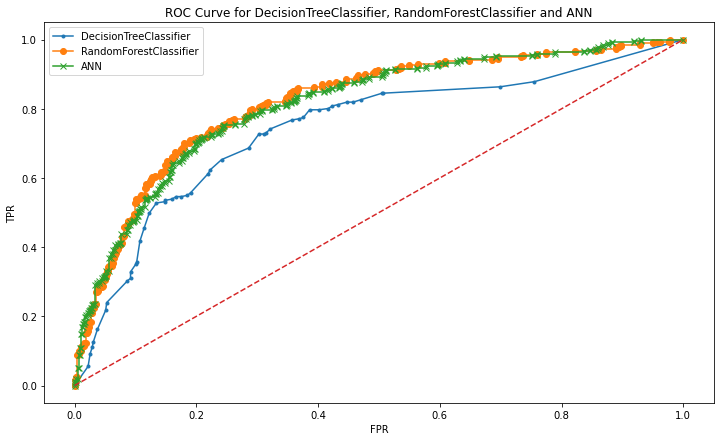

In [132]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(test_labels, cart_best_grid.predict_proba(X_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(test_labels,best_grid_ann.predict_proba(ann_x_test)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(test_labels, cart_best_grid.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(test_labels,best_grid_ann.predict_proba(ann_x_test)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

# Final Conclusion:
#### Artifical Neural Network(ANN) performs better than Decision Tree and Random Forest
#### Train and test score of ANN is 77%
####   AUC of Train and test in ANN is 81%
####    f1 score of Train and test in ANN is 60%
#### Accuracy ,AUC,Precision,Recall for test data are almost inline with training data in Artifical Neural Network(ANN).This indicates no overfitting or underfitting in the model
#### Although ANN models are moderate enough for prediction.But still, the model is more useful only in class 0 than class 1.This is because the dataset is unbalanced and we may have a class imbalance problem
#### We need to collect more data to build a good model.
#### Both  Random Forest model and Decision Tree( CART) have overfitting data .Because, Random Forest model and Decision Tree( CART) modeled the training data too well and therefore the model is weak in generalising and predicting any new data.

# 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

# Recommendations:
#### Prediction Models needs to be trained with huge voulmes of documents/transactions to cover all possible scenarios.
#### In machine learning,Right data source and quality of data used to train predictive models is equally important as the quanity 
#### Accurate prediction gives a probability to decrease financial loss for the company
#### In our dataset , there are no sufficient amount to train the data,so it created class imbalance problem during the prediction
#### we recommend the client to collect more data in quality and quantity wise
#### Also, Insurance company should concentrate more in the variables like Agency_code ,Sales,Duration data .These variables will helpful in good future prediction.